## Star Wars Fan Survey


The project was created to answer the question:

**does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

As a result, the dataset contains survey information from Star Wars fans. 835 surveys were collected.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#star_wars = pd.read_csv("star_wars.csv")
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
#Column names
print("Amount of columns: ", len(star_wars.columns))
print("\nColumn names:\n", star_wars.columns)

Amount of columns:  38

Column names:
 Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',


In [4]:
print(star_wars.shape)
star_wars.head(3)

(1187, 38)


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


## Modifying RespondentID

* The dataset needs to be cleaned to make it easy to represent in column format

**RespondentID** column represents a unique ID for each respondent, but some rows have blank RespondentID, so they need to be removed

In [5]:
#NaN values in RespondentID
star_wars["RespondentID"].isnull().value_counts()

False    1186
True        1
Name: RespondentID, dtype: int64

* 1 row needs to be removed

In [6]:
#Removing rows where "RespondentID" has NaN value
print("Number of rows with 'Respondent ID' NaN values: ", star_wars.shape[0])
star_wars = star_wars[star_wars["RespondentID"].notnull()]
print("Number of rows without 'Respondent ID' NaN values: ", star_wars.shape[0])

Number of rows with 'Respondent ID' NaN values:  1187
Number of rows without 'Respondent ID' NaN values:  1186


## Modifying Yes/No questions

Two columns ask the following questions:

1. Have you seen any of the 6 films in the Star Wars franchise? 
2. Do you consider yourself to be a fan of the Star Wars film franchise?
These two columns have answers as Yes, No, or NaN.

It is convenient and more useful to convert these string values into Boolean (True/False/NaN) values

In [7]:
#question 1
question1 = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]
print("question 1, unique values:\n", question1.unique())

#question 2
question2 = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]
print("\nquestion 2, unique values:\n", question2.unique())

question 1, unique values:
 ['Yes' 'No']

question 2, unique values:
 ['Yes' nan 'No']


* These two column questions have values of Yes, No, or NaN, and so they will be replaced to Boolean values

In [8]:
#Dictionary that will be used to map yes and no values to True and False
maps = {"Yes": True, "No": False}

In [9]:
#Converting question1 values
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = question1.map(maps)
print("question 1 after map: ")
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

question 1 after map: 


True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [10]:
#Converting question2 values
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = question2.map(maps)
print("question 2 after map: ")
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

question 2 after map: 


True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Modifying checkbox questions

The following columns represent a single checkbox question, but are separated among 6 different column for each of the 6 checkbox options:

1. **Which of the following Star Wars films have you seen? Please select all that apply.** - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
2. **Unnamed: 4** - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
3. **Unnamed: 5** - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
4. **Unnamed: 6** - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
5. **Unnamed: 7** - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
6. **Unnamed: 8** - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

In [11]:
#Observing values for each checkbox column
question1 = star_wars["Which of the following Star Wars films have you seen? Please select all that apply."]
print("question 1 values:\n", question1.unique())
question2 = star_wars["Unnamed: 4"]
print("question 2 values:\n", question2.unique())
question3 = star_wars["Unnamed: 5"]
print("question 3 values:\n", question3.unique())
question4 = star_wars["Unnamed: 6"]
print("question 4 values:\n", question4.unique())
question5 = star_wars["Unnamed: 7"]
print("question 5 values:\n", question5.unique())
question6 = star_wars["Unnamed: 8"]
print("question 6 values:\n", question6.unique())

question 1 values:
 ['Star Wars: Episode I  The Phantom Menace' nan]
question 2 values:
 ['Star Wars: Episode II  Attack of the Clones' nan]
question 3 values:
 ['Star Wars: Episode III  Revenge of the Sith' nan]
question 4 values:
 ['Star Wars: Episode IV  A New Hope' nan]
question 5 values:
 ['Star Wars: Episode V The Empire Strikes Back' nan]
question 6 values:
 ['Star Wars: Episode VI Return of the Jedi' nan]


It will be easier if we transform these columns into Boolean values: True/ False. 
The NaN values mean failure to respond, or haven't watched the movie.
* NaN values will be transformed into False

**Converting to Boolean**

In [12]:
#mapping dictionary to True or False
true_false = {"Star Wars: Episode I  The Phantom Menace":True,
             "Star Wars: Episode II  Attack of the Clones":True,
             "Star Wars: Episode III  Revenge of the Sith":True,
             "Star Wars: Episode IV  A New Hope":True,
             "Star Wars: Episode V The Empire Strikes Back":True,
             "Star Wars: Episode VI Return of the Jedi":True,
             np.NaN:False}

In [13]:
#Applying Boolean mapping for each checkbox column
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(true_false)
    print("Values after update for", col, ":\n", star_wars[col].value_counts(dropna=False))    

Values after update for Which of the following Star Wars films have you seen? Please select all that apply. :
 True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
Values after update for Unnamed: 4 :
 False    615
True     571
Name: Unnamed: 4, dtype: int64
Values after update for Unnamed: 5 :
 False    636
True     550
Name: Unnamed: 5, dtype: int64
Values after update for Unnamed: 6 :
 True     607
False    579
Name: Unnamed: 6, dtype: int64
Values after update for Unnamed: 7 :
 True     758
False    428
Name: Unnamed: 7, dtype: int64
Values after update for Unnamed: 8 :
 True     738
False    448
Name: Unnamed: 8, dtype: int64


In [14]:
#Renaming to more intuitive column names
print("Column names before change:\n", star_wars.columns[3:9], "\n")
star_wars = star_wars.rename(columns={"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
                 "Unnamed: 4": "seen_2",
                 "Unnamed: 5": "seen_3",
                 "Unnamed: 6": "seen_4",
                 "Unnamed: 7": "seen_5",
                 "Unnamed: 8": "seen_6"})
print("Column names after change:\n", star_wars.columns[3:9])


Column names before change:
 Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object') 

Column names after change:
 Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')


## Modifying Preference rank columns

The following 6 columns rank the 6 Star Wars movies from 1 to 6, or NaN. Being 6 the lowest score, and 1 the most favorite.

Columns 9 to 14 inclusive:
1. **Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. **- How much the respondent liked Episode I The Phantom Menace
2. **Unnamed: 10** - How much the respondent liked Episode II Attack of the Clones
3. **Unnamed: 11** - How much the respondent liked Episode III Revenge of the Sith
4. **Unnamed: 12** - How much the respondent liked Episode IV A New Hope
5. **Unnamed: 13** - How much the respondent liked Episode V The Empire Strikes Back
6. **Unnamed: 14** - How much the respondent liked Episode VI Return of the Jedi

In [15]:
star_wars[star_wars.columns[9:15]].head(3)

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6


* Need to convert to float values first

In [16]:
#Converting 6 column values to float values
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars[star_wars.columns[9:15]].head(3)

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0


In [17]:
#Renaming columns to more descriptive names
print("Old column names:\n", star_wars.columns[9:15], "\n")
star_wars = star_wars.rename(columns = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1",
                                       "Unnamed: 10":"ranking_2",
                                       "Unnamed: 11":"ranking_3",
                                       "Unnamed: 12":"ranking_4",
                                       "Unnamed: 13":"ranking_5",
                                       "Unnamed: 14":"ranking_6"})
print("New column names:\n", star_wars.columns[9:15])

Old column names:
 Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object') 

New column names:
 Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')


**Capturing highest ranked movie**

In [18]:
#Finding Arithmetic mean of ranked columns
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

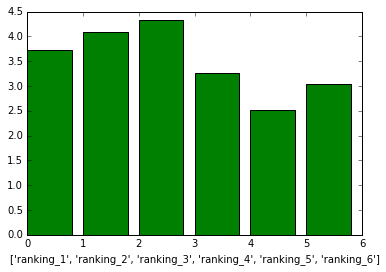

In [19]:
#Plotting averages of movies rated
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean(), color="green")
plt.xlabel(list(star_wars.columns[9:15]))
plt.show()

* As we can see in the previous graph, Star Wars movie 3 received the lowest rating. The last 3 Star war movies received the highest rating (closer to 1) on average.

### Calculating amount of viewers per Movie (using seen columns)

We can calculate the amount of people that watched each movie (column) by counting the values returned from the questionaire. 

These values are Boolean, and so they account for 1 for each row in the respective column(movie).

In [20]:
#Counting viewers on seen columns
seen_sum = star_wars[star_wars.columns[3:9]].sum()
seen_sum

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

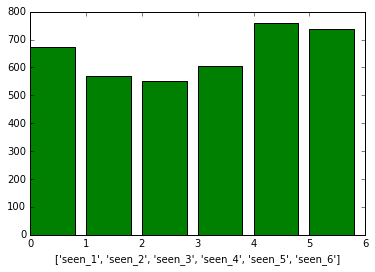

In [21]:
plt.bar(range(6), seen_sum, color="green")
plt.xlabel(list(star_wars.columns[3:9]))
plt.show()

* The most watched movies are the last two movies, which are also the highest rated.
* The least watched movies are movie 2, 3, and 4. These movies are also the lowest rated.

## Analyzing disting Survey population

The population of survey respondents can be divided among by the following columns:
1. **Do you consider yourself to be a fan of the Star Wars film franchise?** - True or False
2. **Do you consider yourself to be a fan of the Star Trek franchise?** - Yes or No
3. **Gender** - Male or Female

The dataframe can be split into two groups based on the binary columns, which will help observe which movies are more popular depending on the group population

**Splitting**

In [25]:
#Based on Star Wars fan
starwarsfan_yes = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]==True]
starwarsfan_no = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]==False]
#Based on Star Trek fan
startrekfan_yes = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"]=="Yes"]
startrekfan_no = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"]=="No"]
#Based on gender
males = star_wars[star_wars["Gender"]=="Male"]
females = star_wars[star_wars["Gender"]=="Female"]

## New analysis based on splits
**Star Wars Fan**

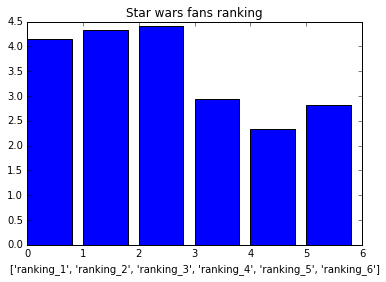

In [43]:
plt.bar(range(6), starwarsfan_yes[starwarsfan_yes.columns[9:15]].mean(), color="blue")
plt.xlabel(list(starwarsfan_yes.columns[9:15]))
plt.title("Star wars fans ranking")
plt.show()

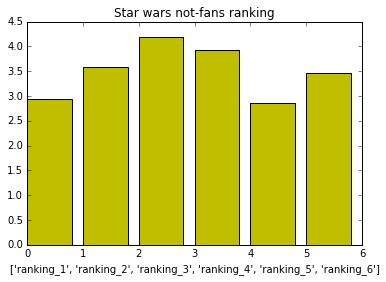

In [36]:
plt.bar(range(6), starwarsfan_no[starwarsfan_no.columns[9:15]].mean(), color="y")
plt.xlabel(list(starwarsfan_no.columns[9:15]))
plt.title("Star wars not-fans ranking")
plt.show()

* It is observed that among fans, the last three movies were the highest ranked

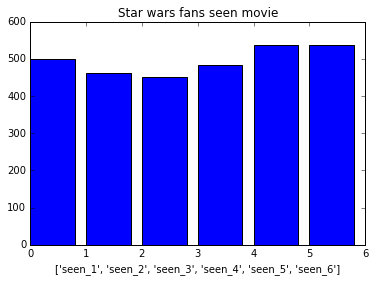

In [37]:
plt.bar(range(6), starwarsfan_yes[starwarsfan_yes.columns[3:9]].sum(), color="b")
plt.xlabel(list(starwarsfan_yes.columns[3:9]))
plt.title("Star wars fans seen movie")
plt.show()

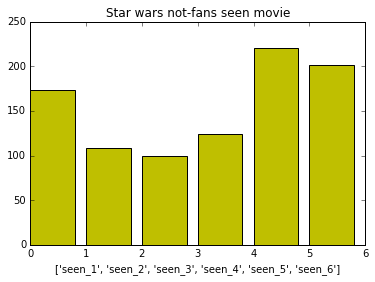

In [38]:
plt.bar(range(6), starwarsfan_no[starwarsfan_no.columns[3:9]].sum(), color="y")
plt.xlabel(list(starwarsfan_no.columns[3:9]))
plt.title("Star wars not-fans seen movie")
plt.show()

* Last two graphs show the obvious, Star Wars fans show 5 times more seen than not fans

**Based on Gender**

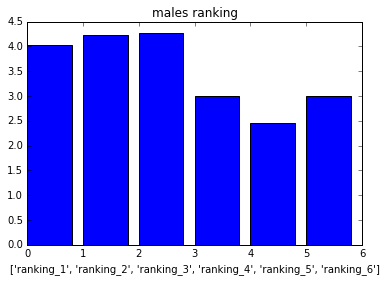

In [44]:
plt.bar(range(6), males[males.columns[9:15]].mean(), color="blue")
plt.xlabel(list(males.columns[9:15]))
plt.title("males ranking")
plt.show()

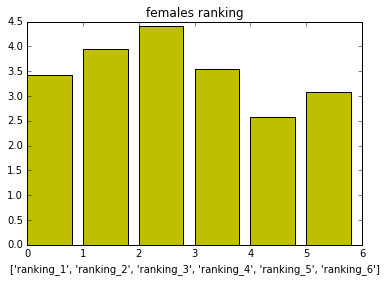

In [47]:
plt.bar(range(6), females[females.columns[9:15]].mean(), color="y")
plt.xlabel(list(females.columns[9:15]))
plt.title("females ranking")
plt.show()

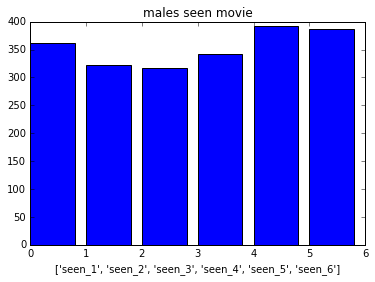

In [48]:
plt.bar(range(6), males[males.columns[3:9]].sum(), color="b")
plt.xlabel(list(males.columns[3:9]))
plt.title("males seen movie")
plt.show()

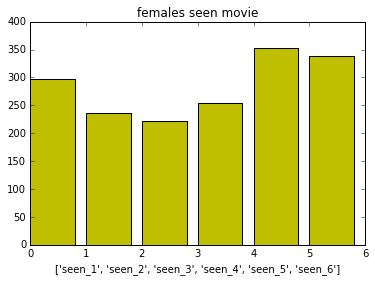

In [49]:
plt.bar(range(6), females[females.columns[3:9]].sum(), color="y")
plt.xlabel(list(females.columns[3:9]))
plt.title("females seen movie")
plt.show()